# Array Based Sequences

Key topics:
* Python sequence class: list, tuple, str
* Low level arrays
* Dynamic arrays and mortization
* Efficiency of python sequence types
* Using array based sequences

In [4]:
# install packages
from time import time
import matplotlib.pyplot as plt

Python’s implementation of the append method exhibits amortized constant-time behavior. We can demonstrate this fact experimentally:

In [9]:
def compute_avg(n):
    """
    perform n appends to an empty list and return average time elapsed
    """
    data = []
    start = time()
    for k in range(n):
        data.append(None)
    end = time()

    return (end - start)/ n

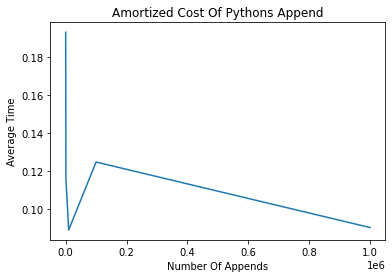

In [14]:
# iterate over different ns and identify patterns
ns = [100, 1000, 10000, 100000, 1000000]
t = []
for i in ns:
    t.append(10**6*compute_avg(i))

# plot
plt.plot(ns, t)
plt.xlabel('Number Of Appends')
plt.ylabel('Average Time')
plt.title('Amortized Cost Of Pythons Append')
plt.show()

We see higher average cost for the smaller data sets, perhaps in part due to the overhead of the loop range. There is also natural variance in measuring the amortized cost in this way, because of the impact of the final resize event relative to n. Taken as a whole, there seems clear evidence that the amortized time for each append is independent of n

## Using Array Based Sequences

### Application: Storing High Scores For A Game

In [15]:
"""
Python code for a simple GameEntry class. We include methods for returning the name and score for a game entry object, as well as a method
for returning a string representation of this entry.
"""

class GameEntry():
    """
    represents one entry of a game score
    """
    def __init__(self, name, score):
        self._name = name
        self._score = score

    def get_name(self):
        return self._name
    
    def get_score(self):
        return self._score
    
    def __str__ (self):
        return '({0}, {1})'.format(self._name, self._score) # e.g., (Bob, 98)

In [ ]:
"""
To maintain a sequence of high scores, we develop a class named Scoreboard. A scoreboard is limited to a certain number of high scores that can be saved; once that
limit is reached, a new score only qualifies for the scoreboard if it is strictly higher than the lowest “high score” on the board
"""

class Scoreboard():

    """
    fixed-length sequence of high scores in nondecreasing order
    """
    def __init__(self, capacity = 10):
        """
        initialize scoreboard with given maximum capacity
        all entries are initially None
        """
        self._board = [None]*capacity # reserve space for future entries
        self._n = 0 # number of actual entries

    def __getitem__(self, k):
        """return entry at index k"""
        return self._board[k]
    
    def __str__ (self):
        """return string representation of the high score list"""
        return '\n'.join(str(self._board[j]) for j in range(self._n))
    
    def add(self, entry):
        """consider adding score to high scores"""
        score = entry.get_score()

        # assess if new score qualifies for high score
        # answer is yes if board not full or score is higher than last entry
        good = self._n < len(self._board) or score > self._board[-1].get_score()

        if good:
            if self._n < len(self._board): # no score drops from the list
                self._n += 1 # increase number of entries by 1
        
        # shift lower scores rightward to make room for new entry
        j = self._n - 1
        while j > 0 and self._board[j-1].get_score() < score:
            self._board[j] = self._board[j-1] # shift entry from j-1 to j
            j -= 1 # add decrement j
            self._board[j] = entry # when done, add new entry